In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/ds_salaries.csv')
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


There is no missing data in any column.

In [ ]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [ ]:
df.drop(columns ='Unnamed: 0',inplace = True)

Useless column.

In [ ]:
df['job_title'].nunique()

50

There are 50 different job title in data so we need to know which one is the most common in data science.

In [ ]:
Top5Roles=df.groupby('job_title').size().nlargest().to_frame().reset_index()
Top5Roles.columns=['Top 5 Roles','count']
Top5Roles.head()

,Top 5 Roles,count
0,Data Scientist,143
1,Data Engineer,132
2,Data Analyst,97
3,Machine Learning Engineer,41
4,Research Scientist,16


We observe that Data scientist role is the most common and in demand in companies.

# **Top Five of Job roles from 2020 to 2022**

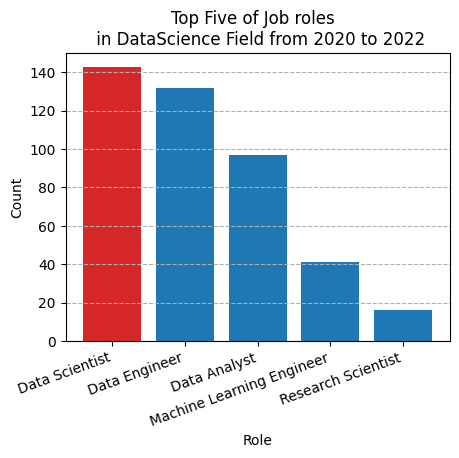

In [ ]:
#declare parameters
label = Top5Roles['Top 5 Roles']
height=Top5Roles['count']
colors=['#d62728','C0','C0','C0','C0']

#create axes and plot bar graph
fig=plt.figure()
ax=fig.add_axes([0.0,0.0,0.6,0.6])
ax.bar(x=label,height=height,color=colors)

#set x and y labels and parameters
ax.set_xlabel('Role')
ax.set_ylabel('Count')
ax.set_title('Top Five of Job roles  \n in DataScience Field from 2020 to 2022')
plt.xticks(rotation=20, ha="right")
plt.grid(True,linestyle='--',axis='y')
plt.show()

Nearly about 24% of data science roles needed is Data scientist.

# **Salary distribution to the top 5 roles**

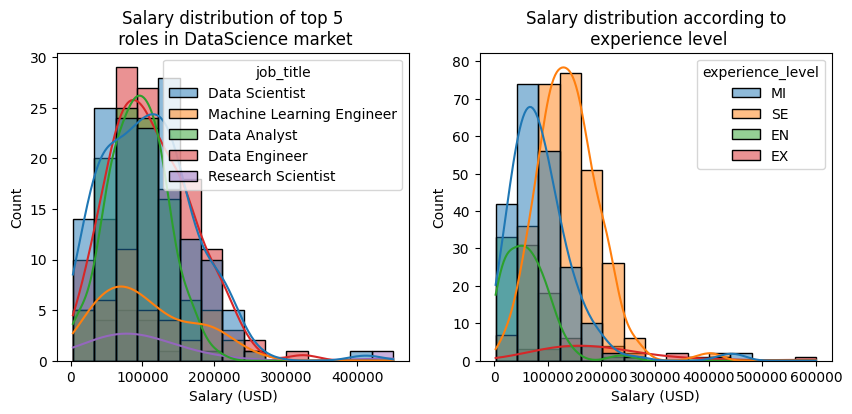

In [ ]:
Top5Roles_titles=list(Top5Roles['Top 5 Roles'])
Top5Roles_salary=df[df['job_title'].isin (Top5Roles_titles)].loc[:, ['job_title','salary_in_usd']]

fig, ax= plt.subplots(1,2,figsize=(10,4))
sns.histplot(data=Top5Roles_salary, x='salary_in_usd',
             hue='job_title',
             kde=True, bins=15,
             ax=ax[0])

sns.histplot(data=df, x='salary_in_usd',
             hue='experience_level', kde=True,
             ax=ax[1], bins=15)

ax[0].set_xlabel('Salary (USD)')
ax[0].set_title('Salary distribution of top 5\n roles in DataScience market')
ax[1].set_xlabel('Salary (USD)')
ax[1].set_title('Salary distribution according to\n experience level')

plt.show()

# **Observation:**
1- The mean Salaries of Seniors in data science field is distributed between 100k $

and 200k $.

2- The mean salaries of Experts nearly the same as seniors except some cases which may be considered outliers.

#**Salaries Distribution with boxplot**

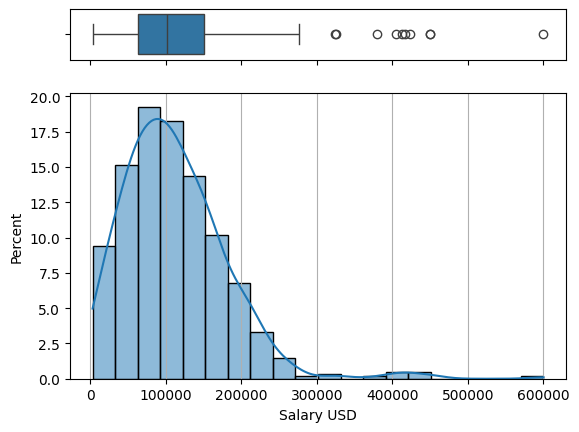

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.boxplot(df["salary_in_usd"], orient="h", ax=ax_box)
sns.histplot(data=df, x="salary_in_usd",bins=20,
             kde=True,stat='percent',
             ax=ax_hist)

ax_hist.set_xlabel('Salary USD')
plt.grid(True,axis='x')
plt.show()

Here we observe some outliers in salary some of these is not effective and others are effective so we need to process it.

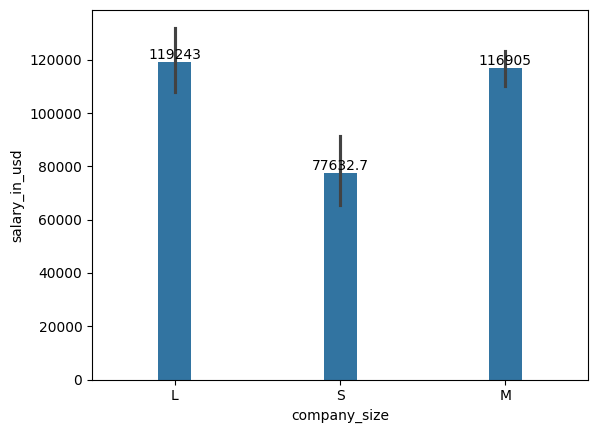

In [ ]:
plot=sns.barplot(data=df,x='company_size', y='salary_in_usd',
            estimator="mean",
            width=.2)
for i in plot.containers:
    plot.bar_label(i,fontsize=10)

plt.show()

Here is a relation between company size and average salary.

# **Study of Year trend in Data Science and some usefull Relations with other Features.**

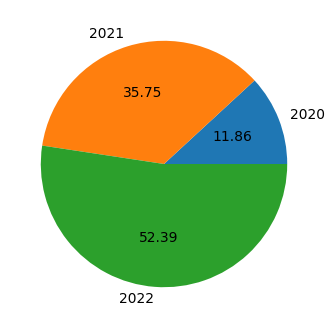

In [ ]:
fig=plt.figure(figsize=(4,4))
df.groupby('work_year').size().plot(kind='pie', autopct='%.2f')
plt.show()

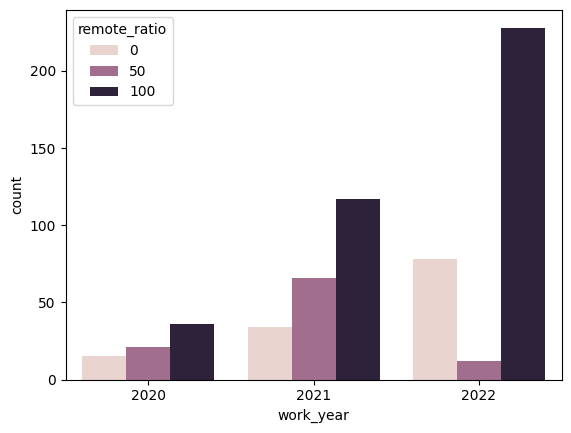

In [ ]:
sns.countplot(data = df, x ='work_year',
              hue = 'remote_ratio')
plt.show()

2022 is the trend in working completely remotely.

# **Salaries mean and distribution for Data science in each year.**

<ipython-input-90-e570d2800a09>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1=sns.barplot(data=df,x='work_year', y='salary_in_usd',


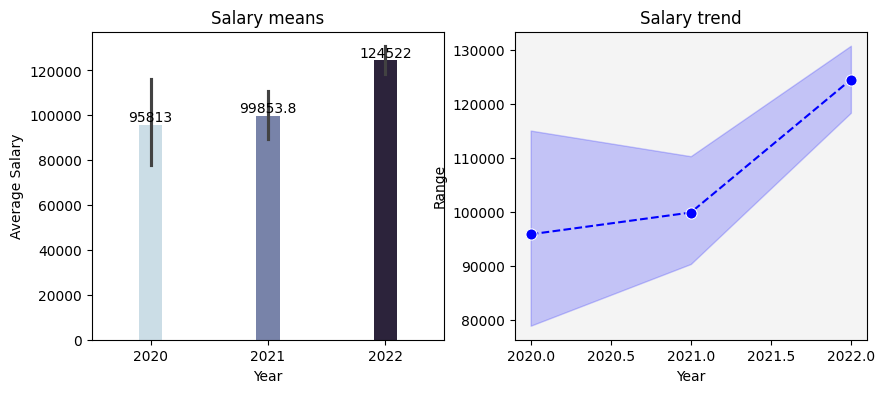

In [ ]:
fig, ax=plt.subplots(1,2,figsize=(10,4))

ax1=sns.barplot(data=df,x='work_year', y='salary_in_usd',
            estimator="mean",
            width=.2,
            palette='ch:s=.25,rot=-.25',
            ax=ax[0])
for i in ax1.containers:
    ax1.bar_label(i,fontsize=10)

ax2=sns.lineplot(data =df ,x = 'work_year', y = 'salary_in_usd',
                 marker = 'o',linestyle='--',
                 color='Blue', markersize=8,ax=ax[1])
ax2.set_facecolor("#f4f4f4")

ax1.set_title('Salary means')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Salary')

ax2.set_title('Salary trend')
ax2.set_xlabel('Year')
ax2.set_ylabel('Range')


plt.show()